In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn
import math

In [11]:
df = pd.read_csv(r"D:\abalone.csv")

To display the first and last few rows of a dataset, make sure that the dataset is loaded without errors.

In [12]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [13]:
df.tail(10)



,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4167,M,0.500,0.380,0.125,0.5770,0.2690,0.1265,0.1535,9
4168,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,8
4169,M,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815,10
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


Analyzing the type of each indicator from the dataset.

In [14]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In my case, all the data, except for gender, are quantitative features. Gender is a qualitative feature. In addition, the "Rings" variable is a discrete random variable, while the others are continuous random variables.

Display and analyze the statistical characteristics of each indicator. For quantitative indicators, these are the minimum, maximum, mean, median, and standard deviation. For qualitative indicators, this includes the total number of values, the number of unique values, the mode value, and its frequency.

In [15]:
include =['object', 'float', 'int64'] 
df.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [16]:
df.describe(include='object')

,Sex
count,4177
unique,3
top,M
freq,1528


Check for missing values in the data. If there are any, either remove all rows with missing values or fill the gaps with the mean/median/mode of the corresponding column.

In [38]:
trueOrFalse = df.isnull().sum()
print(trueOrFalse)
if(trueOrFalse.sum() == False): 
    print('There are no missing values.')
df = df.loc[df['Height'] != 0]
df

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
There are no missing values.


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


For each indicator that can be considered as a discrete random variable, plot the probability function graph.

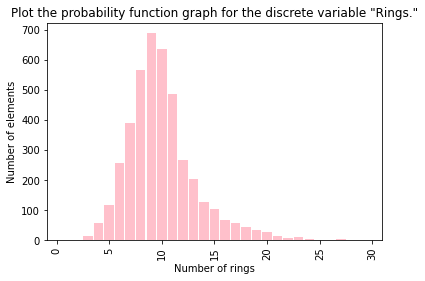

In [39]:
rings = df['Rings'].value_counts().sort_index()
plt.bar(rings.index, rings.values, width  = 0.9, color = 'pink') ;
plt.xticks(rotation=90) ;
plt.xlabel('Number of rings')
plt.ylabel('Number of elements')
plt.title('Plot the probability function graph for the discrete variable "Rings."') ;

For each indicator that can be considered as a continuous random variable, conduct a normality identification. To achieve this:

Calculate the skewness and kurtosis coefficients for the variable and test the hypotheses about their equality to zero (do both coefficients confirm the hypothesis of equality to zero?).

Plot a histogram and kernel density estimation (KDE) of the probability density function (PDF) (does it indicate a normal distribution? If not, what distribution is indicated? Are the data homogeneous?).

Construct a normal probability plot and display the sample data on it (do the data points lie on the straight line, suggesting normal distribution?).

In [21]:
columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
newColumns = ['Skew', 'StatisticsSkew', 'PSkew', 'Kurtosis', 'StaticsKurtosis', 'PKurtosis']
skewlist = []
kurtosislist = []
skewstat = []
pskew = []
kurtosisstat = []
pkurtosis = []
for i in columns:
    skewlist.append(st.skew(df[i]))
    kurtosislist.append(st.kurtosis(df[i]))
    st_, p = st.skewtest(df[i])
    skewstat.append(st_)
    pskew.append(p)
    st__, p_ = st.kurtosistest(df[i])
    kurtosisstat.append(st__)
    pkurtosis.append(p_)
dict = {'Skew': skewlist, 'StatisticsSkew': skewstat, 'PSkew': pskew , 'Kurtosis' : kurtosislist, 'StaticsKurtosis': kurtosisstat, 'PKurtosis' :pkurtosis}
results = pd.DataFrame(index = columns, columns= newColumns, data = dict)
results

,Skew,StatisticsSkew,PSkew,Kurtosis,StaticsKurtosis,PKurtosis
Length,-0.640763,-15.556943,1.427573e-54,0.066247,0.904756,3.655947e-01
Diameter,-0.609962,-14.910122,2.832350e-50,-0.044142,-0.540182,5.890718e-01
Height,3.165226,44.605051,0.000000e+00,76.663065,39.528254,0.000000e+00
Whole weight,0.530358,13.183892,1.086377e-39,-0.024871,-0.276361,7.822707e-01
Shucked weight,0.718477,17.137173,7.836900e-66,0.592971,6.168682,6.886177e-10
Viscera weight,0.591243,14.511261,1.028137e-47,0.082646,1.106531,2.684969e-01
Shell weight,0.620857,15.140263,8.786193e-52,0.530288,5.648703,1.616632e-08


Length is not normal distribution
Diameter is not normal distribution
Height is not normal distribution
Whole weight is not normal distribution
Shucked weight is not normal distribution
Viscera weight is not normal distribution
Shell weight is not normal distribution


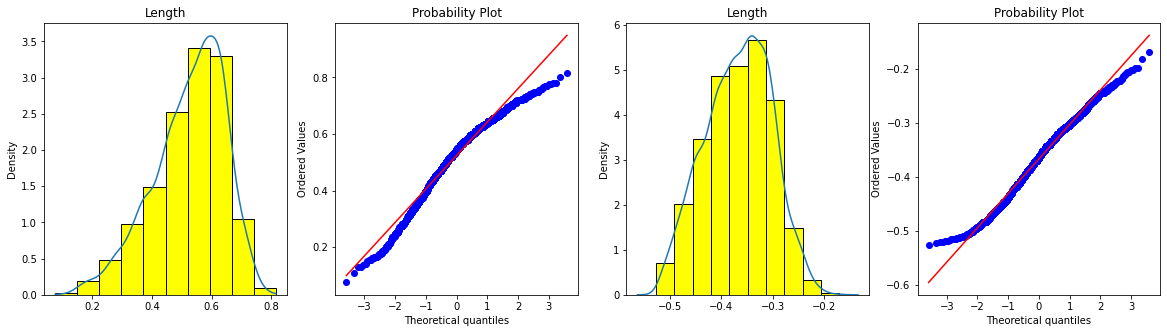

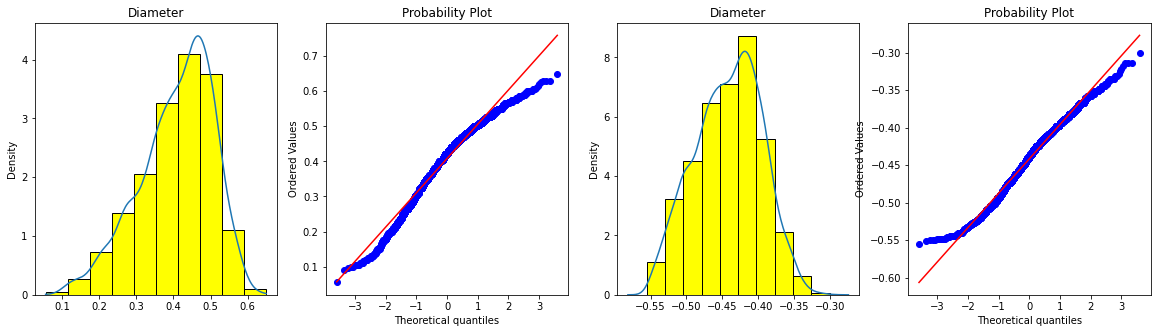

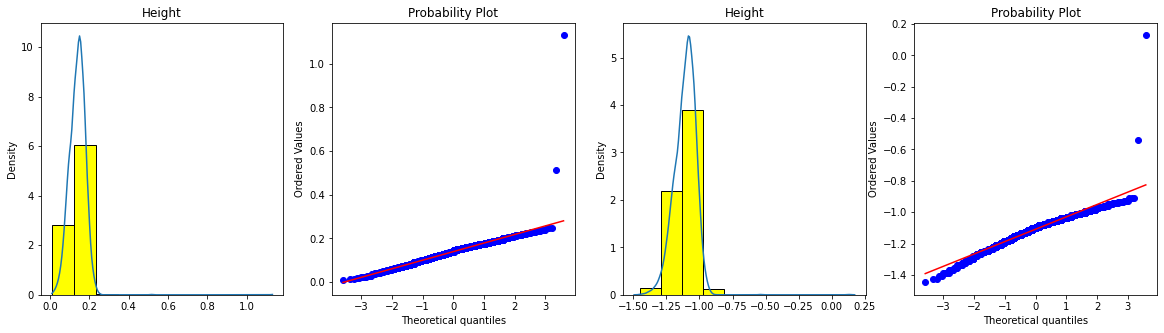

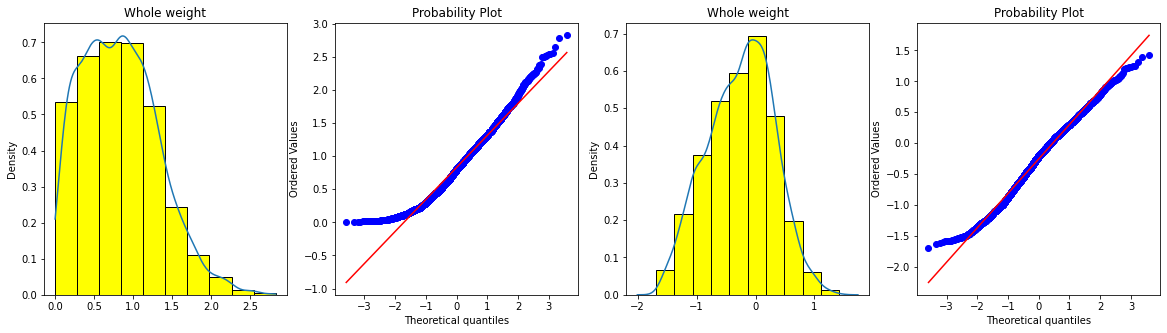

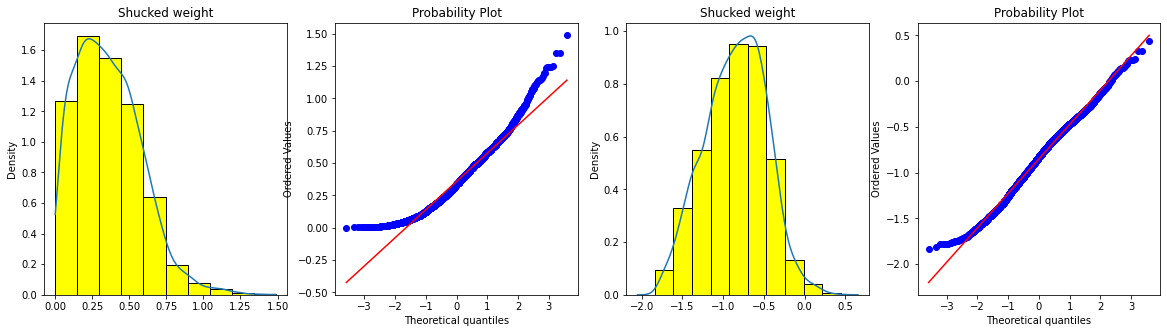

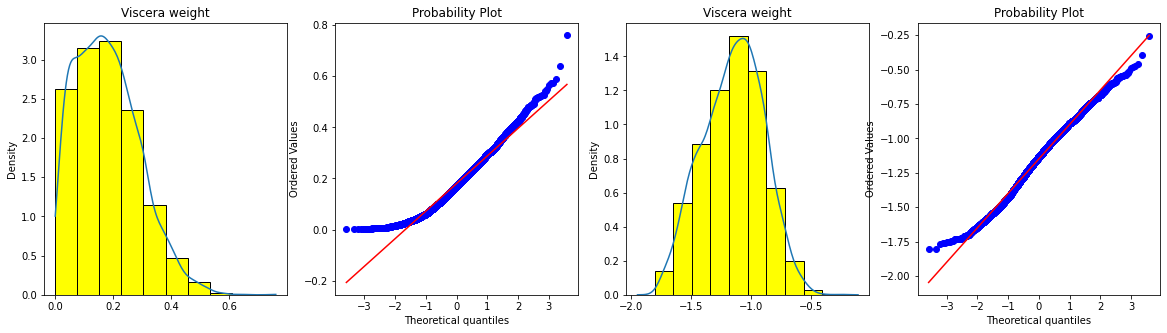

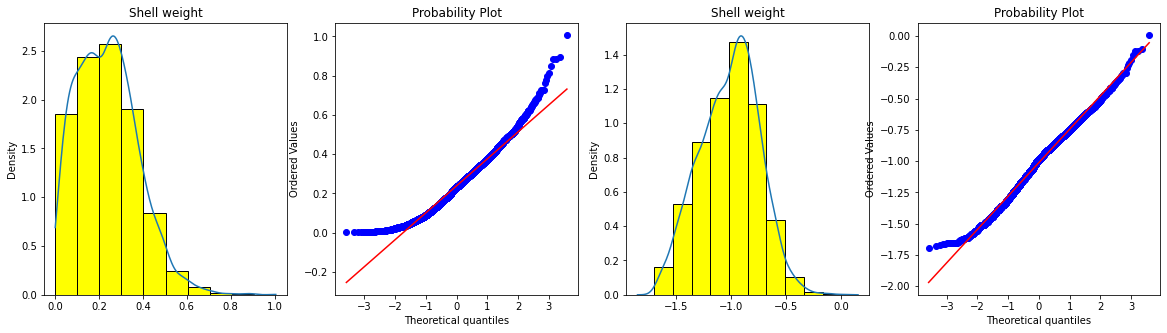

In [23]:
alpha = st.norm.ppf(0.975)
for index, row in results.iterrows():
    if row['PSkew'] > 0.05 and row['PKurtosis'] > 0.05:
    #if abs(row['StatisticsSkew']) < alpha and abs(row['StaticsKurtosis']) < alpha:
            print('{0} is normal distribution'.format(index))
    else:
            print('{0} is not normal distribution'.format(index))
newdata = pd.DataFrame(index = range(df.shape[0]), columns= columns)
for i in columns:
    x = df[i].dropna()
    plt.figure(figsize=(20,5))
    plt.subplot(1, 4, 1)
    df[i].plot.hist(density = True, color='yellow', edgecolor='black') ;
    lin = np.linspace(df[i].min(), df[i].max(), num=200)
    lin.sort() 
    plt.title(i)
    df[i].plot.kde(ind = lin) ;
    plt.subplot(1, 4, 2)
    st.probplot(df[i], plot=plt) ;
    xt, _ = st.boxcox(df[i])
    #print(xt)
    #xt = np.log(df[i])
    plt.subplot(1, 4, 3)
    plt.hist(xt, density = True, color='yellow', edgecolor='black') ;
    plt.title(i)
    seaborn.kdeplot(xt) ;
    plt.subplot(1, 4, 4)
    st.probplot(xt, plot=plt) ;
    newdata[i] = pd.Series(xt)
    plt.show()

In [24]:
skewlist1 = []
kurtosislist1 = []
skewstat1 = []
pskew1 = []
kurtosisstat1 = []
pkurtosis1 = []
for i in columns:
    skewlist1.append(st.skew(newdata[i]))
    kurtosislist1.append(st.kurtosis(newdata[i]))
    st_1, p1 = st.skewtest(newdata[i])
    skewstat1.append(st_1)
    pskew1.append(p1)
    st__1, p_1 = st.kurtosistest(newdata[i])
    kurtosisstat1.append(st__1)
    pkurtosis1.append(p_1)
dict1 = {'Skew': skewlist1, 'StatisticsSkew': skewstat1, 'PSkew': pskew1 , 'Kurtosis' : kurtosislist1, 'StaticsKurtosis': kurtosisstat1, 'PKurtosis' :pkurtosis1}
results1 = pd.DataFrame(index = columns, columns= newColumns, data = dict1)
results1

,Skew,StatisticsSkew,PSkew,Kurtosis,StaticsKurtosis,PKurtosis
Length,-0.127775,-3.363008,7.709817e-04,-0.560610,-10.462197,1.288326e-25
Diameter,-0.136263,-3.584450,3.377897e-04,-0.589269,-11.261627,2.029763e-29
Height,0.415546,10.557165,4.706631e-26,13.493780,29.381331,9.511898e-190
Whole weight,-0.109948,-2.896804,3.769854e-03,-0.498158,-8.848308,8.885596e-19
Shucked weight,-0.086033,-2.269323,2.324868e-02,-0.369735,-5.981395,2.212344e-09
Viscera weight,-0.103801,-2.735739,6.224041e-03,-0.503199,-8.972599,2.895989e-19
Shell weight,-0.087330,-2.303425,2.125495e-02,-0.329359,-5.182760,2.186264e-07


In [25]:
for index, row in results1.iterrows():
    #if row['PSkew'] > 0.05 and row['PKurtosis'] > 0.05:
    if abs(row['StatisticsSkew']) < alpha and abs(row['StaticsKurtosis']) < alpha:
        print('{0} is normal distribution'.format(index))
    else:
        print('{0} is not normal distribution'.format(index))

Length is not normal distribution
Diameter is not normal distribution
Height is not normal distribution
Whole weight is not normal distribution
Shucked weight is not normal distribution
Viscera weight is not normal distribution
Shell weight is not normal distribution


In [26]:
for i in columns:
    k = 3
    q1 = np.percentile(df[i], 25) 
    q3 = np.percentile(df[i], 75) 
    a = q1 - k * (q3 - q1)
    b = q3 + k * (q3 - q1)
    #df[i].where((df[i] >= a) & (df[i] <= b), inplace=True)
    df[i].loc[lambda x: (x < a) | (x > b)] = np.NaN
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            2
Whole weight      0
Shucked weight    1
Viscera weight    1
Shell weight      1
Rings             0
dtype: int64

In [27]:
#df = df.dropna()
df = df.fillna(df.mean())
df

C:\Users\alyti\AppData\Local\Temp\ipykernel_17000\1389964893.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Частина 2 (40% балів за роботу) 

In [28]:
df = pd.read_csv(r"D:\abalone.csv")

In [29]:
def Qu(alpha = 0.05):
    return st.norm.ppf(1 - alpha/2)

In [32]:
columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
qu = Qu(0.05)

In [33]:
def Mediana(x):
    counts = x.count()
    x = sorted(x)
    if(counts%2==0):
        return (x[(int)(counts/2)]+x[(int)(counts/2-1)])/2
    else:
        return x[(int)((counts-1)/2)]
def Average(x):
    return x.sum()/x.count()
def StandardDeviation(x, average, bias = False):
    if(bias):
        return math.sqrt(sum((s-average)**2 for s in x)/(len(x)-1))
    else:
        return math.sqrt(sum((s-average)**2 for s in x)/(len(x)))    
def kurtosisint(x,kurtosis):
    count = x.count()
    sqr = (math.sqrt(count+1)*math.sqrt(count+1)*math.sqrt(count+3)*math.sqrt(count+5))
    en = kurtosis - qu * math.sqrt(24*count*(count-2))*math.sqrt(count-3)/sqr
    ev = kurtosis + qu * math.sqrt(6*(count-2)/((count+1)*(count+3)))
    return (en, ev)
def Describe(x, DI = False):
    count = x.count()
    minimum = x.min()
    maximum = x.max()
    average = Average(x)
    mediana = Mediana(x)
    standardDeviation = StandardDeviation(x, average)
    standardDeviation2 = StandardDeviation(x, average, True)
    skew1 = sum((s-average)**3 for s in x)/(len(x)*standardDeviation2**3) #A1
    #skew2 = math.sqrt(count*(count-1))/(count-2)*skew
    kurtosis = sum((s-average)**4 for s in x)/(len(x)*standardDeviation2**4) - 3 #E1
    #kurtosis2 = (count**2-1)/(n-2)/(n-3)*(kurtosis+6/(count+1))
    #skew3 = sum((s-average)**3 for s in x)/(len(x)*standardDeviation**3) #A3 
    if DI==True:
        #доверительный интервал для среднего значения
        mn = average - qu * standardDeviation/math.sqrt(count)
        mv = average + qu * standardDeviation/math.sqrt(count)
        #доверительній интервал для медианы
        x1 = sorted(x)
        j = (int)(count/2 - qu * math.sqrt(count)/2)
        k = (int)(count/2 + 1  + qu * math.sqrt(count)/2)
        #доверительный интервал для среднеквадратического отклонения
        stdn = standardDeviation - qu *standardDeviation/math.sqrt(2*count)
        stdv = standardDeviation + qu *standardDeviation/math.sqrt(2*count)
        #доверительный интервал для ассиметрии
        an = skew1 - qu * math.sqrt(6*(count-2)/((count+1)*(count+3)))
        av = skew1 + qu * math.sqrt(6*(count-2)/((count+1)*(count+3)))
        #доверительный интервал для эксцесса
        en, ev = kurtosisint(x, kurtosis)
        return (minimum, maximum, average, mediana, standardDeviation, skew1, kurtosis, 
            (mn, mv), (x1[j], x1[k]), (stdn, stdv), (an, av), (en, ev))
    else: 
        return (minimum, maximum, average, mediana, standardDeviation, skew1, kurtosis) 
#     dict2 = {'Minimum': minimum, 'Maximum': maximum, 'Average': average , 'Mediana' : mediana, 'standardDeviation': standardDeviation, 'Skew' :skew, 'Kurtosis': kurtosis, 'DI for mat': (mn, mv), 'DI for std': (stdn, stdv), 'DI for mediana': (x1[j], x1[k]), 'DI for skew':(an, av), 'DI for kurtosis': (en, ev) }
#     columns2 = ['Minimum','Maximum','Average','Mediana', 'standardDeviation','Skew','Kurtosis', 'DI for mat', 'DI for std', 'DI for mediana', 'DI for skew', 'DI for kurtosis']
#     results2 = pd.DataFrame(columns = columns2,  data = dict2)
#     return results2
columns2 = ['Minimum','Maximum','Average','DI for mat', 'Mediana',  'DI for mediana', 'standardDeviation', 'DI for std','Skew', 'DI for skew', 'Kurtosis', 'DI for kurtosis']
mini = []
maxi = []
aver = []
median = []
std = []
skew_ = []
kurtosis_ = []
mnmv = []
x1kx1j = []
stdnstdv =[]
anav = []
enev = []
for i in columns:
    desc = Describe(df[i], True)
    mini.append(desc[0])
    maxi.append(desc[1])
    aver.append(desc[2])
    median.append(desc[3])
    std.append(desc[4])
    skew_.append(desc[5])
    kurtosis_.append(desc[6])
    mnmv.append(desc[7])
    x1kx1j.append(desc[8])
    stdnstdv.append(desc[9])
    anav.append(desc[10])
    enev.append(desc[11])
dict2 = {'Minimum': mini, 'Maximum': maxi, 'Average': aver ,'DI for mat': mnmv, 'Mediana' : median,'DI for mediana': x1kx1j, 'standardDeviation': std, 'DI for std': stdnstdv,'Skew' :skew_, 'DI for skew':anav, 'Kurtosis': kurtosis_,  'DI for kurtosis': enev }
results2 = pd.DataFrame(index = columns, columns = columns2, data = dict2)

#######################################################################################
# columns3 = ['Minimum','Maximum','Average', 'Mediana', 'standardDeviation','Skew', 'Kurtosis']
# for i in columns:
#     desc = Describe(df[i], False)
#     mini.append(desc[0])
#     maxi.append(desc[1])
#     aver.append(desc[2])
#     median.append(desc[3])
#     std.append(desc[4])
#     skew_.append(desc[5])
#     kurtosis_.append(desc[6])
# dict2 = {'Minimum': mini, 'Maximum': maxi, 'Average': aver , 'Mediana' : median, 'standardDeviation': std, 'Skew' :skew_,  'Kurtosis': kurtosis_ }
# results2 = pd.DataFrame(index = columns, columns = columns3, data = dict2)
results2


,Minimum,Maximum,Average,DI for mat,Mediana,DI for mediana,standardDeviation,DI for std,Skew,DI for skew,Kurtosis,DI for kurtosis
Length,0.0750,0.8150,0.523992,"(0.520350591843856, 0.5276336073421628)",0.5450,"(0.535, 0.55)",0.120079,"(0.11750360138285902, 0.12265347102919842)",-0.639414,"(-0.7136437967005789, -0.5651837499163028)",0.061641,"(-0.08665915488092843, 0.13587109729240104)"
Diameter,0.0550,0.6500,0.407881,"(0.40487206157454253, 0.41089044740319275)",0.4250,"(0.42, 0.43)",0.099228,"(0.09710016538374579, 0.1013558068149814)",-0.608761,"(-0.682990697984756, -0.5345306512004802)",-0.048271,"(-0.19657131912512402, 0.025958933048205457)"
Height,0.0000,1.1300,0.139516,"(0.13824810174651056, 0.14078469691281428)",0.1400,"(0.14, 0.145)",0.041822,"(0.040925227656090975, 0.04271887129930937)",3.126571,"(3.052340538814661, 3.200800585598937)",75.895309,"(75.7470088507159, 75.96953910288923)"
Whole weight,0.0020,2.8255,0.828742,"(0.813872377607749, 0.8436119412814058)",0.7995,"(0.7775, 0.8195)",0.490330,"(0.4798157900421865, 0.5008448371853584)",0.530577,"(0.4563472562929855, 0.6048073030772614)",-0.026476,"(-0.17477580658919697, 0.0477544455841325)"
Shucked weight,0.0010,1.4880,0.359367,"(0.35263703483482545, 0.36609794242157867)",0.3360,"(0.327, 0.346)",0.221936,"(0.21717722826391014, 0.2266955272994288)",0.718582,"(0.6443515111409381, 0.792811557925214)",0.591255,"(0.44295505700110704, 0.6654853091744366)"
Viscera weight,0.0005,0.7600,0.180594,"(0.17726983850416472, 0.1839173772008867)",0.1710,"(0.1655, 0.174)",0.109601,"(0.10725086845941108, 0.11195138815006316)",0.591427,"(0.5171971165155882, 0.665657163299864)",0.080999,"(-0.067300855687319, 0.15522939648601047)"
Shell weight,0.0015,1.0050,0.238831,"(0.23460989764035783, 0.24305182129667824)",0.2340,"(0.225, 0.239)",0.139186,"(0.1362013347970259, 0.1421706762606692)",0.620481,"(0.5462509115943666, 0.6947109583786424)",0.528164,"(0.3798633488879949, 0.6023936010613244)"


histogram(x, bins=None, normed="frequency") - constructs a histogram for the given indicator. It takes three arguments:

x - the indicator.
bins - the number of bins (classes). If this argument is not specified by the user, the number of bins is automatically estimated using one of the formulas discussed in the lecture.
normed - can take one of three values: "frequency," "probability," or "density." If the user provides something else, they should see the message "Invalid value for the 'normed' argument," and the histogram should be constructed with the default parameter. 
If normed="frequency", the histogram should display frequencies of occurrences. 
If normed="probability", the histogram should display relative frequencies. 
If normed="density", the histogram should be scaled to the density function.

[0.075      0.13192308 0.18884615 0.24576923 0.30269231 0.35961538
 0.41653846 0.47346154 0.53038462 0.58730769 0.64423077 0.70115385
 0.75807692 0.815     ]
[0.10346153846153847, 0.16038461538461538, 0.2173076923076923, 0.2742307692307693, 0.33115384615384613, 0.3880769230769231, 0.44500000000000006, 0.5019230769230769, 0.5588461538461538, 0.6157692307692307, 0.6726923076923077, 0.7296153846153846, 0.7865384615384615] 13


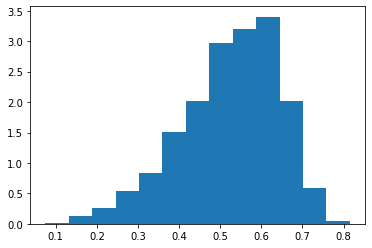

In [34]:
def histogram(x, bins = None, normed = 'frequency'):
    if bins==None:
        bins = int(round(1 + 1.44 * np.log(x.count())))
    if normed!='frequency' and normed!='probability' and normed!='density':
        print('Недопустиме значення аргументу normed')
        return None
    data = x.value_counts().sort_index()
    bin_array = np.linspace(x.min(), x.max(), bins + 1)
    print(bin_array)
    myHist=[]
    hist = []
    paras = []
    for i in range(len(bin_array)-1):
        mask = (data.index>=bin_array[i])&(data.index<bin_array[i+1])
        hist.append((bin_array[i]+bin_array[i+1])/2.)
        myHist.append(data[mask].values.sum())  
    width = (x.max() - x.min()) / bins
    print(hist, bins)    
    if normed=='frequency':
        plt.bar(hist, myHist, width=width)
    elif normed=='probability':
        plt.bar(hist, myHist/x.count(), width)
    elif normed=='density':
        plt.bar(hist, myHist/(x.count() * width), width =  width)
        
histogram(df['Length'], normed = 'density')        


kde(x, h = None) – будує графік ядерної оцінки функції щільності з гаусовим ядром для заданого показника, приймає два аргументи: x – показник; h – ширина вікна, додатне значення, якщо користувач задав щось інше, має видатися повідомлення «Недопустиме значення параметра h», а графік побудуватися з параметром за замовчуванням, якщо  h = None, то ширина вікна має бути визначена за правилом Сільвермана або Скотта. 

0.02888744563756211


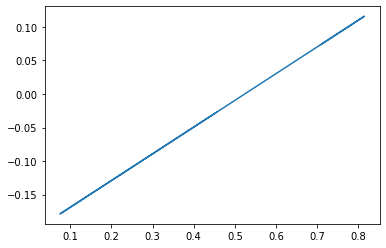

In [35]:
def kde(x, h = None): 
    if h==None:
        average = Average(x)
        standardDeviation = StandardDeviation(x, average)
        i=(int)((x.count()-1.0)/4.0+0.5);  
        a=x[x.count()-1-i]-x[i]/1.34
        h=0.9*a/math.pow(x.count(), 0.2); 
        print(h)
    if h<=0:
        print('Недопустиме значення парамтера h')
    u = 0.05
    ex = math.exp(-(u**2)/2)
    k = (1/math.sqrt(2*math.pi))*ex
    def f(x1,k, h):
        return sum([(k*(x1 - a)/h) for a in x])   
    fx=[]
    for i in x:
        fx.append(1/x.count()*h* f(i, k, h))
    plt.plot(x, fx)
    
kde(df['Length'])  

        

`normal_paper(x)` - constructs a normal probability plot for a normal distribution and displays the data of the indicator `x` on it.

In [36]:
def normal_paper(x):
    fx = 1/math.sqrt(2*math.pi)

`outliers(x, alpha=0.05)` - searches for outliers in the indicator `x` using one of the methods discussed in the lecture (any method of choice). It returns the found outlier values and also constructs a graph where the values of the indicator are plotted on the ordinate axis, and their indices are plotted on the abscissa axis. Anomalous values should be marked in red on the graph, while non-anomalous values should be marked in black. The parameter `alpha` determines the probability that a value is considered an outlier, and by default, it is set to 0.05.

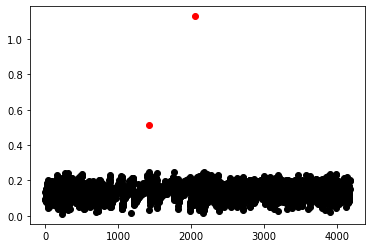

1417    0.515
2051    1.130
Name: Height, dtype: float64

In [41]:
def percentile(data, percentile):
    size = len(data)
    return sorted(data)[int(math.ceil(size * percentile) / 100) - 1]
def outliers(x, k = 3):
    q1 = percentile(x, 25) 
    q3 = percentile(x, 75) 
    a = q1 - k * (q3 - q1)
    b = q3 + k * (q3 - q1)
    notAnomaly = x.where((x >= a) & (x <= b))
    anomaly = x.loc[lambda m: (m < a) | (m > b)]
    plt.plot(notAnomaly, marker='o', color='black', ls='')
    plt.plot(anomaly, marker='o', color='red', ls='')
    plt.show()
    return anomaly
outliers(df['Height'])

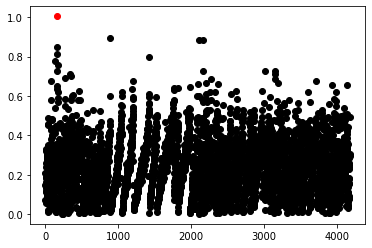

163    1.005
Name: Shell weight, dtype: float64

In [44]:
def percentile(data, percentile):
    size = len(data)
    return sorted(data)[int(math.ceil(size * percentile) / 100) - 1]
def outliers(x, alpha = 0.05):
    average = Average(x)
    quant = Qu(alpha)
    a = average - quant * math.sqrt(sum((s-average)**2 for s in x)/(len(x)-1))
    b = average + quant * math.sqrt(sum((s-average)**2 for s in x)/(len(x)-1))
    notAnomaly = x.where((x >= a) & (x <= b))
    anomaly = x.loc[(x <= a) | (x >= b)]
    plt.plot(notAnomaly, marker='o', color='black', ls='')
    plt.plot(anomaly, marker='o', color='red', ls='')
    plt.show()
    return anomaly
outliers(df['Shell weight'], alpha = 0.0000005)